In [73]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

**Data Preprocessing Part 1**

In [4]:
#Open Dataset
parkinsons_data = pd.read_csv('parkinsons_disease_data.csv')
parkinsons_data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [21]:
#Drop Irrelevant Features
pk_irr = parkinsons_data.drop('PatientID',axis=1)
pk_features = parkinsons_data.drop('DoctorInCharge',axis=1)

In [48]:
#Decouple Features and Target
pk_features = pk_irr.drop('Diagnosis',axis=1)
pk_target = pk_irr['Diagnosis']

In [ ]:
#Apply SMOTE for class imbalance correction
smote = SMOTE()
pk_x_smote, pk_y_smote = smote.fit_resample(pk_features, pk_target)

**Data Visualization**

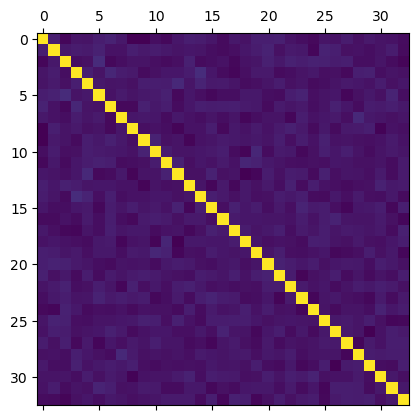

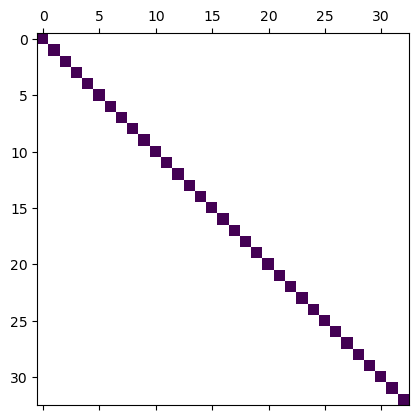

In [50]:
#Visualize Correlation
data_correlation = pk_features.corr()
data_high_correlation = data_correlation[abs(data_correlation) >= 0.5]
plt.matshow(data_correlation)
plt.matshow(data_high_correlation)

The above heatmap shows that none of the features in this dataset have a correlation above the cutoff we chose, which was 0.5. Therefore, there was no need to remove any features on account of correlation.

Diagnosis
1    1304
0     801
Name: count, dtype: int64


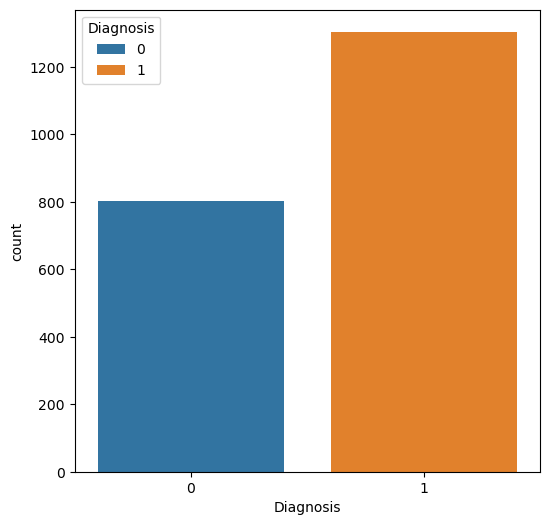

In [61]:
#Visualize Original Class Imbalance
print(pk_irr['Diagnosis'].value_counts())
plt.figure(figsize=(6, 6))
sns.countplot(x='Diagnosis', data=pk_irr, hue='Diagnosis')
plt.show()

There was a considerable class imbalance; most of the data points in the dataset were of the positive class (patients with parkinsons). This was corrected by applying SMOTE.

**Data Preprocessing Part 2**